## Customer Churn Analysis
#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
#Shape of the Dataset
df.shape

(7043, 21)

In the above dataset there is 7043 Rows and 21 Columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.select_dtypes(['float64']).columns

Index(['MonthlyCharges'], dtype='object')

In [7]:
df.select_dtypes(['int64']).columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [8]:
df.select_dtypes(['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In the above dataset there is total 21 columns in which 1 column is float64 datatype, 2 columns is int64 datatype and 18 columns is object datatype

In [9]:
#Total charges contain float value but it showing datatype as object, so converting it into float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


now the above dataset there is total 21 columns in which 2 column is float64 datatype, 2 columns is int64 datatype and 17 columns is object datatype

In [11]:
#Checking Null Values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

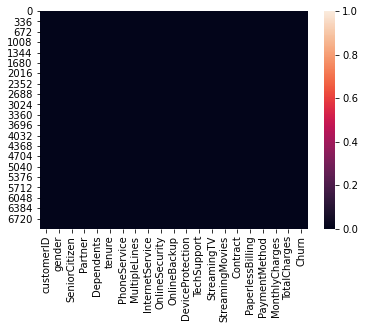

In [12]:
sns.heatmap(df.isnull())

In ithe above observation we can see there are total 11 null values in TotalCharges now we handdle it.


In [13]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
#Filling Null values by mean
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we can see there is no null values which is good

In [16]:
# Shows the unique values present in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
#Dropping the unnecessary columns Customer ID which is unique.
df.drop("customerID", axis=1,inplace=True)

In [18]:
# Summarizing the dataset in statistic format
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- Total counts in Each columns is 7043
- In SeniorCitizeb column we found there is two values 1 and 0
- lowest tenure is 0 , avrg is 32.37 and max is 72.
- Min monthly Charge is 18.25, avg is 64.76 and max is 118.75
- Min Total Charge is 18, avg is 2283.300 and max is 8684.80

In [19]:
df.duplicated().sum()

22

In [20]:
df=df.drop_duplicates()

In [21]:
df.shape

(7021, 20)

Ther are total 22 duplicate values found in dataset so we removed that values now thw shape of dataset is 7021 Rows and 20 Columns.

### Exploratory Data Analysis(EDA)
#### Univariate Analysis

In [22]:
#Target variable Churn
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

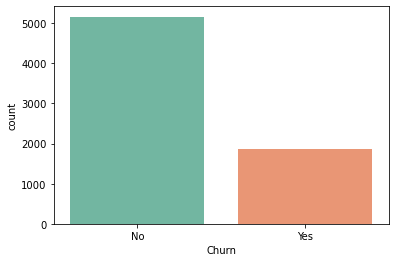

In [23]:
sns.countplot(df['Churn'],palette="Set2")

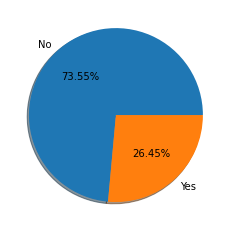

In [24]:
# Pie chart for class variable Loan Status
labels='No','Yes'
fig,ax=plt.subplots()
ax.pie(df['Churn'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

73.55 % of the customers do not churn while 26.45% churn rate is yes.We can clearly see that there is class imbalanced issue,will need to handle before model building. 

In [25]:
#Gender column
df['gender'].value_counts()

Male      3541
Female    3480
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

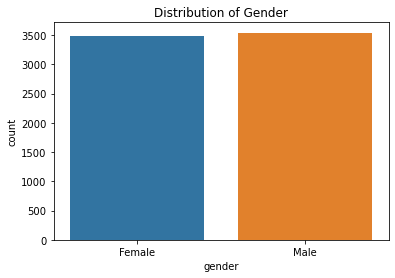

In [28]:
sns.countplot(df['gender'])
plt.title("Distribution of Gender")


In the above graph we can clearly seen that count os male Female is aproximate same.

In [29]:
#SeniorCitizen
df['SeniorCitizen'].value_counts()

0    5880
1    1141
Name: SeniorCitizen, dtype: int64

Text(0.5, 1.0, 'Distribution of Senior Citizen')

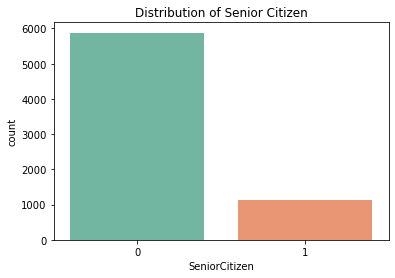

In [30]:
sns.countplot(df['SeniorCitizen'],palette="Set2")
plt.title("Distribution of Senior Citizen")

In the above graph we can see most of the coustmer is non senior citizen and ver less coustmer is senior citizen.

In [31]:
#Partner
df['Partner'].value_counts()

No     3619
Yes    3402
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Distribution of Partner')

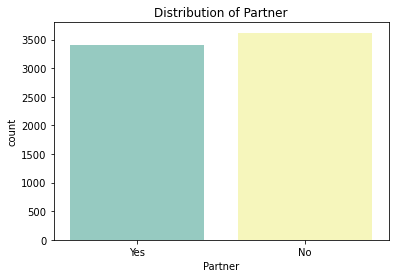

In [32]:
sns.countplot(df['Partner'],palette="Set3")
plt.title("Distribution of Partner")

Partner and no partner values aproximately same.


In [33]:
#Dependents
df['Dependents'].value_counts()

No     4911
Yes    2110
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Distribution of Dependents')

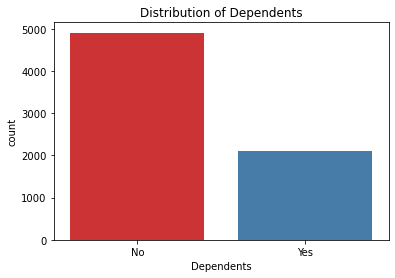

In [34]:
sns.countplot(df['Dependents'],palette="Set1")
plt.title("Distribution of Dependents")

Aprox 70% of the coustmer is not dependent and aprox 30% coustmer is dependent.

<AxesSubplot:xlabel='tenure', ylabel='count'>

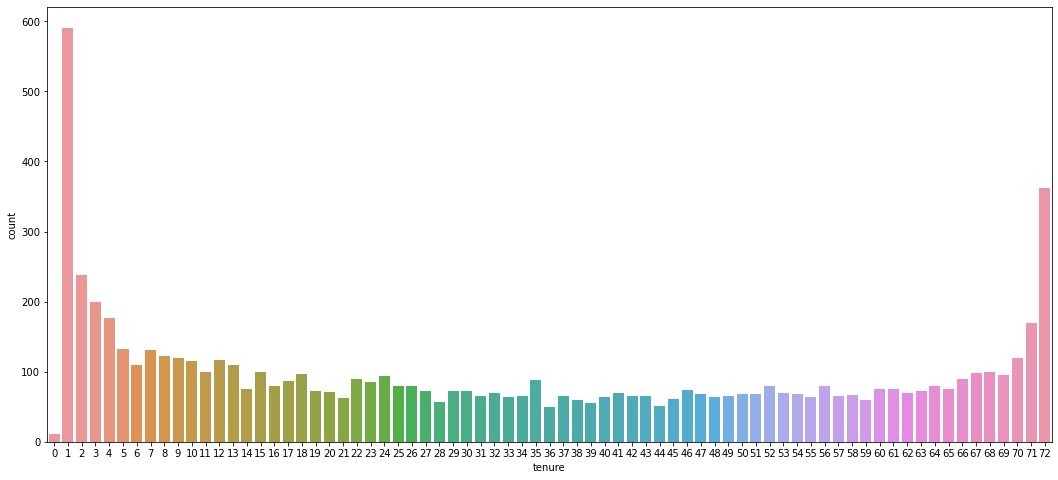

In [35]:
#Tenure
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"])

The customer with 1 year of tenure and 72 year of tenure are highest among all other tenure.

In [36]:
#Phone Service
df['PhoneService'].value_counts()

Yes    6339
No      682
Name: PhoneService, dtype: int64

Text(0.5, 1.0, 'Distribution of Phone Service')

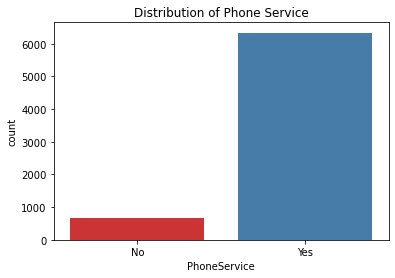

In [37]:
sns.countplot(df['PhoneService'],palette="Set1")
plt.title("Distribution of Phone Service")

In [38]:
#Multiple Lines
df['MultipleLines'].value_counts()

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Text(0.5, 1.0, 'Distribution of Multiple Lines')

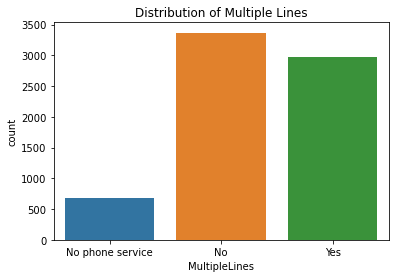

In [39]:
sns.countplot(df['MultipleLines'],palette=None)
plt.title("Distribution of Multiple Lines")

#### Observation
- Most of our customers have used our phone services.
- Among the customers who use phone service, around 50% have multiple lines.

In [40]:
#Internet Service
df['InternetService'].value_counts()

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Service')

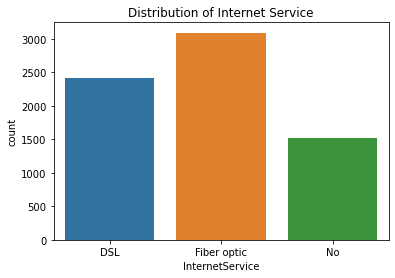

In [41]:
sns.countplot(df['InternetService'],palette=None)
plt.title("Distribution of Internet Service")

In [42]:
#Online Security
df['OnlineSecurity'].value_counts()

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64

Text(0.5, 1.0, 'Distribution of Online Security')

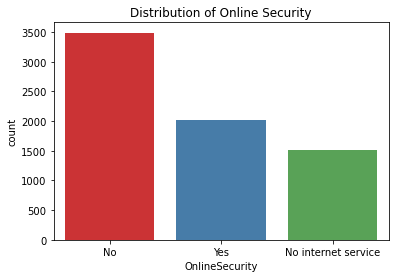

In [43]:
sns.countplot(df['OnlineSecurity'],palette='Set1')
plt.title("Distribution of Online Security")

In [44]:
# Online Backup
df['OnlineBackup'].value_counts()

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64

Text(0.5, 1.0, 'Distribution of Online Backup')

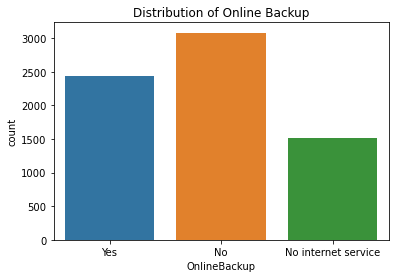

In [45]:
sns.countplot(df['OnlineBackup'],palette=None)
plt.title("Distribution of Online Backup")

#### Observations
- Many of the customers have opted for the fiber optic internet service.
- Online security is not provided for around 50% of customers.
- Online Backup facility is opted as no by 44% of the customers.

In [46]:
#Device Protection
df['DeviceProtection'].value_counts()

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64

Text(0.5, 1.0, 'Distribution of Device Protection')

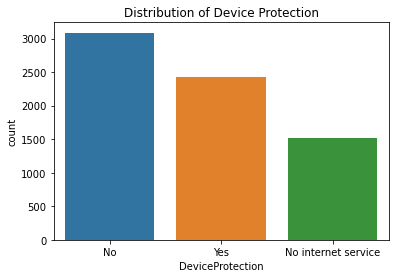

In [47]:
sns.countplot(df['DeviceProtection'],palette=None)
plt.title("Distribution of Device Protection")

Majority of customers opted as no for device protection.

In [48]:
#Tech Support
df['TechSupport'].value_counts()

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64

Text(0.5, 1.0, 'Distribution of Tech Support')

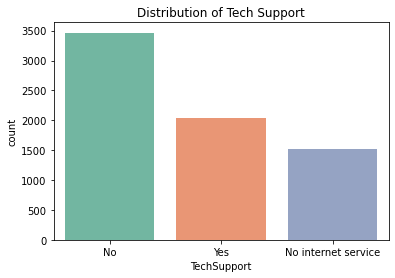

In [49]:
sns.countplot(df['TechSupport'],palette='Set2')
plt.title("Distribution of Tech Support")

Around 1/2 of the customers has no technical support service.

In [50]:
#Straming Tv
df['StreamingTV'].value_counts()

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64

Text(0.5, 1.0, 'Distribution of Streaming TV')

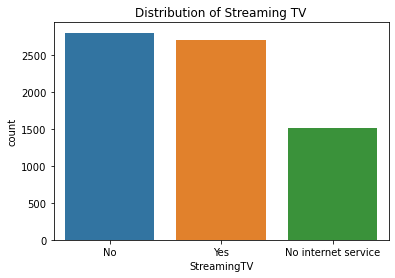

In [51]:
sns.countplot(df['StreamingTV'],palette=None)
plt.title("Distribution of Streaming TV")


In [52]:
#Streaming Movies
df['StreamingMovies'].value_counts()


No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64

Text(0.5, 1.0, 'Distribution of Streaming Movies')

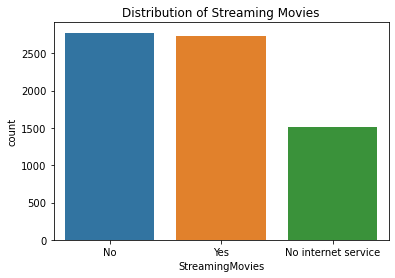

In [54]:
sns.countplot(df['StreamingMovies'],palette=None)
plt.title("Distribution of Streaming Movies")

#### Observation
- It can be seen that number of people who opted and who didn't for streaming TV and Streaming Movies are in almost equal distribution.

In [55]:
#Contract 
df['Contract'].value_counts()

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Distribution of Contract')

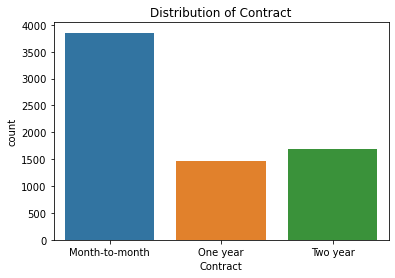

In [56]:
sns.countplot(df['Contract'],palette=None)
plt.title("Distribution of Contract")

In [57]:
#Paperless Billing
df['PaperlessBilling'].value_counts()

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64

Text(0.5, 1.0, 'Distribution of Paperless Billing')

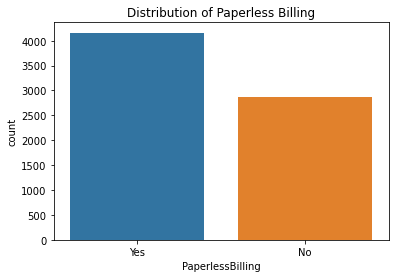

In [58]:
sns.countplot(df['PaperlessBilling'],palette=None)
plt.title("Distribution of Paperless Billing")

In [59]:
#Payment Method
df['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Text(0.5, 1.0, 'Distribution of Payment Method')

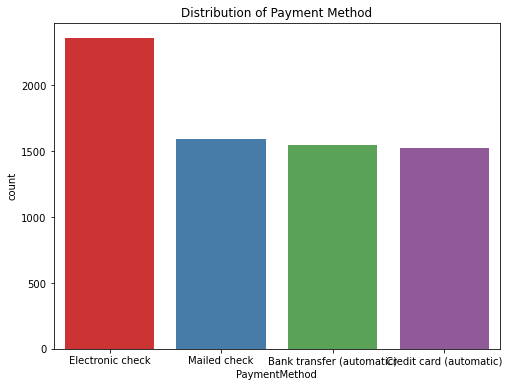

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(df['PaymentMethod'],palette='Set1')
plt.title("Distribution of Payment Method")

#### Observations
- Around half of our customers signed month-to-month contract with us.
- Around 2/3 rd of customer are going with paperless billing.
- More customers are going to pay with electronic check.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

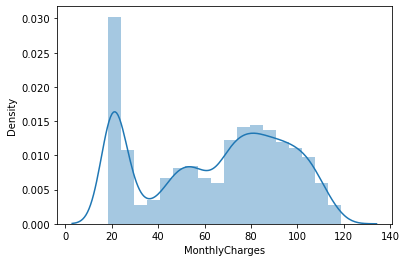

In [61]:
#Monthly Charges
sns.distplot(df['MonthlyCharges'])

Data is not normally distributed above graph shows that data is skewed.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

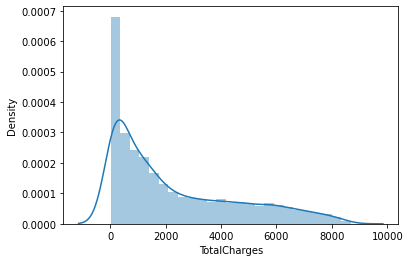

In [62]:
#Total Charges
sns.distplot(df['TotalCharges'])

Total charges are showing that data is highly skewed to the right.

### Bivariate Anaylsis

Text(0.5, 1.0, 'Churn Rate based on Gender')

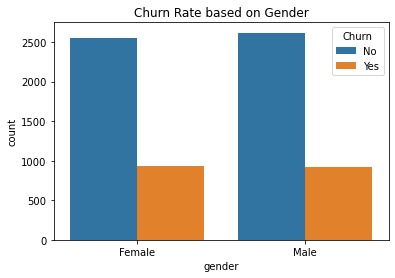

In [63]:
#Count of Churn rate based on Gender.
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate based on Gender')

Text(0.5, 1.0, 'Churn Rate based on SeniorCitizen')

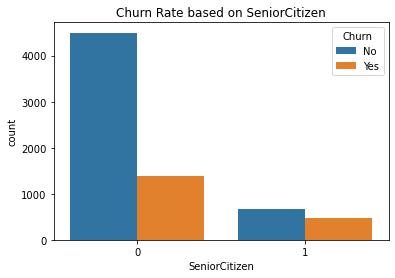

In [64]:
#Count of Churn rate based on SeniorCititzen.
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Rate based on SeniorCitizen')

Text(0.5, 1.0, 'Churn Rate based on Partner')

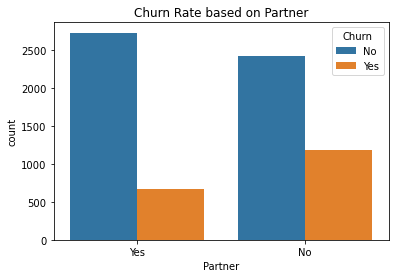

In [65]:
#Count of Churn rate based on Partner.
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Rate based on Partner')

Text(0.5, 1.0, 'Churn Rate based on Dependents')

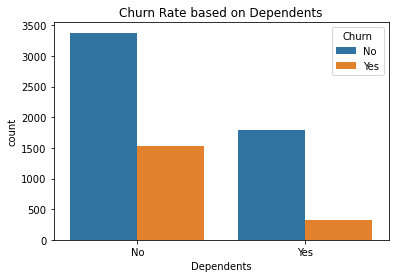

In [66]:
#Count of Churn rate based on Dependents.
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn Rate based on Dependents')

#### Observations
- If the customer is a Senior Citizen, seems to have a higher churn ratio,
- If the customer does not have partner, seems like having higher probrobility leave to leave the company, the same case shows on dependents. Maybe for this part of customer, stable is not their first thing to consider.

Text(0.5, 1.0, 'Churn Rate based on Contracts')

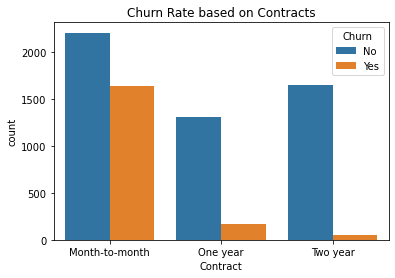

In [67]:
#Count of Churn rate based on Cotracts.
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate based on Contracts')

Text(0.5, 1.0, 'Churn Rate based on Paperless Billing')

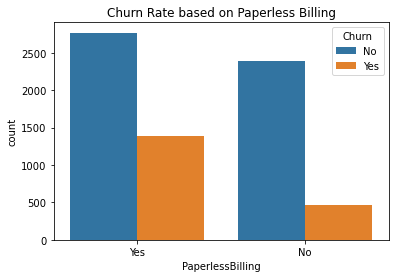

In [68]:
#Count of Churn rate based on Paperless Billings.
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn Rate based on Paperless Billing')

Text(0.5, 1.0, 'Churn Rate based on Payment Method')

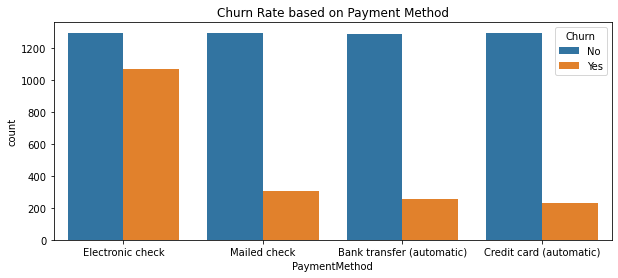

In [69]:
#Count of Churn rate based on Payment Method.
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Rate based on Payment Method')

#### Observations
- Customers who pay with electronic check also are more likely to leave, while when it comes to a compare with other payment types, electronic check is more common, we have to go deeper to check is there a relationship between them.
- Customers with short-term contract are more likely to churn and customer having contract for 2 years are least likely to leave.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

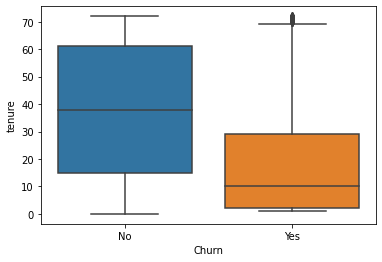

In [70]:
sns.boxplot(x = 'Churn', y = 'tenure',data=df)

We have already witnessed that, longer over 70 months customers are loyal to do not churn.

Text(0.5, 1.0, 'Churn Rate based on Phone Service')

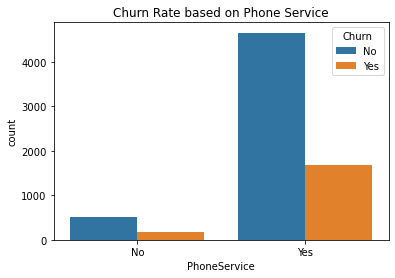

In [71]:
#Count of Churn rate based on Phone Service.
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn Rate based on Phone Service')

Text(0.5, 1.0, 'Churn Rate based on Multiple Lines')

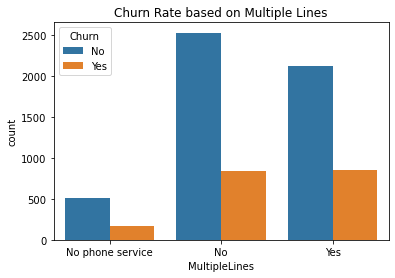

In [72]:
#Count of Churn rate based on MultipleLines.
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn Rate based on Multiple Lines')

Text(0.5, 1.0, 'Churn Rate based on Internet Service')

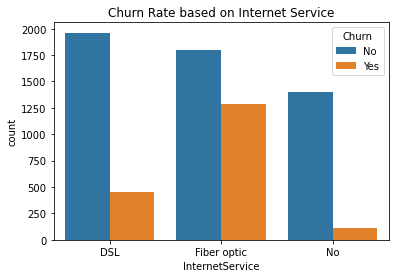

In [73]:
#Count of Churn rate based on Internet Service.
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate based on Internet Service')

#### Observations
- Customers who uses fiber optic internet service are much likely to churn
- Customer with no phone service are least likely to churn.

Text(0.5, 1.0, 'Churn Rate based on Online Security')

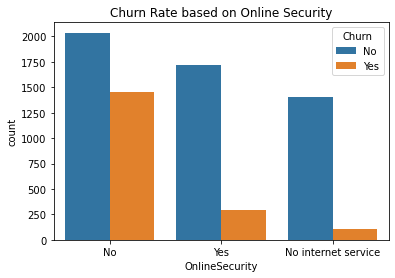

In [74]:
#Count of Churn rate based on Online Security.
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Rate based on Online Security')

Text(0.5, 1.0, 'Churn Rate based on OnlineBackup')

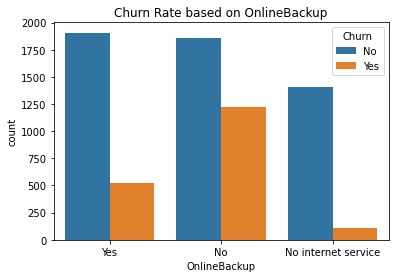

In [75]:
#Count of Churn rate based on Online Backup.
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn Rate based on OnlineBackup')

Text(0.5, 1.0, 'Churn Rate based on Device Protection')

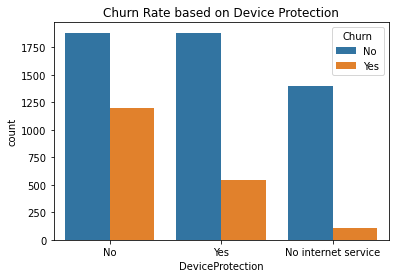

In [76]:
#Count of Churn rate based on Device Protection.
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn Rate based on Device Protection')

Text(0.5, 1.0, 'Churn Rate based on Tech Support')

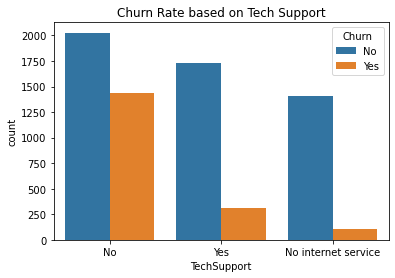

In [77]:
#Count of Churn rate based on Tech Support.
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn Rate based on Tech Support')

#### Observations
- Customers with Tech support service are least likely to churn whereas, in case of no tech support more chances of leaving the company.
- In case Device Protection and Online Backup, Wheather it is provided or not churn rate seeem to be same.
- Customers not having online security as their service has higher churn rate .

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

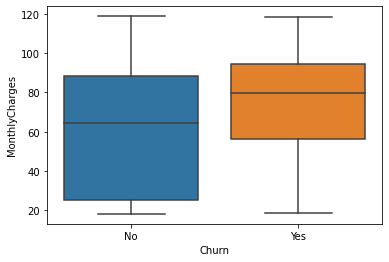

In [78]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

There are not outliers in the data, In an general way we can say that the customers having monthly charges less than 60$ are least likely to leave.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

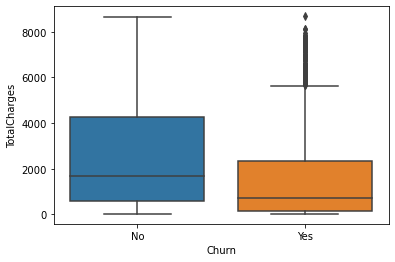

In [79]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)

We can see some outliers in the data for custmers who left the company.


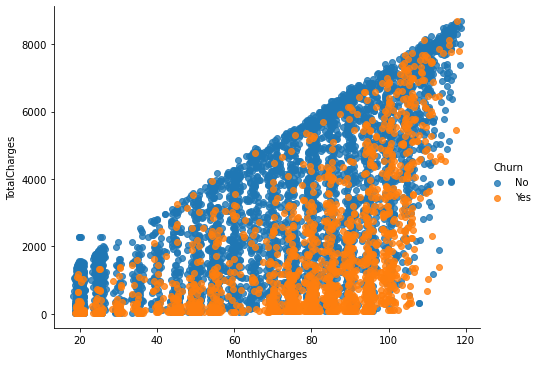

In [80]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Churn",aspect=12/9)

As monthly charges increase total charges also increase they shows strogn positively correlation.

### Encoding the Object Variables

In [81]:
# Shows all categorical variables
df.select_dtypes(['object']).head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [82]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Multivariate analysis

In [83]:
# finding correlation coefficient
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,0.000878,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.101628,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.316758,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.062640,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.824164,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.114064,0.011323
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.451191,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.173281,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.254298,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.375233,-0.194214


<AxesSubplot:>

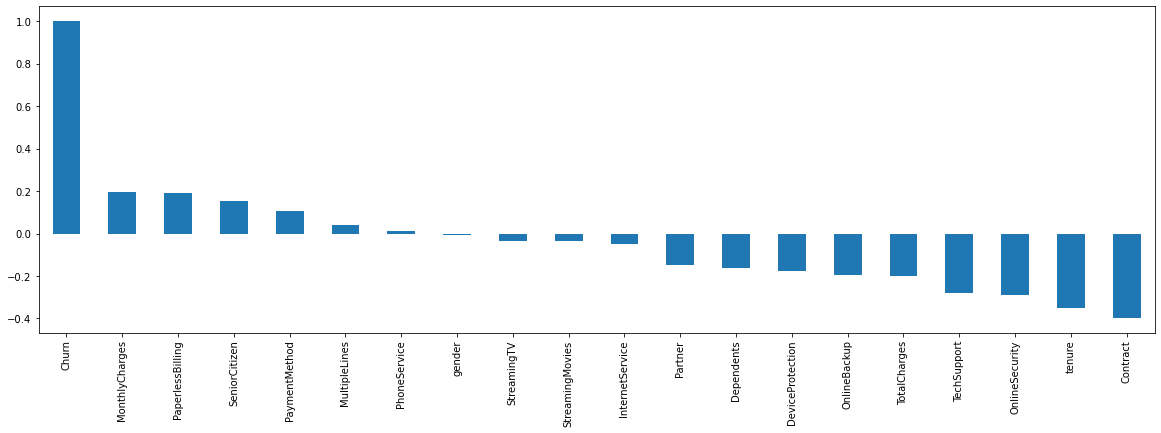

In [84]:
plt.figure(figsize=(20,6))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

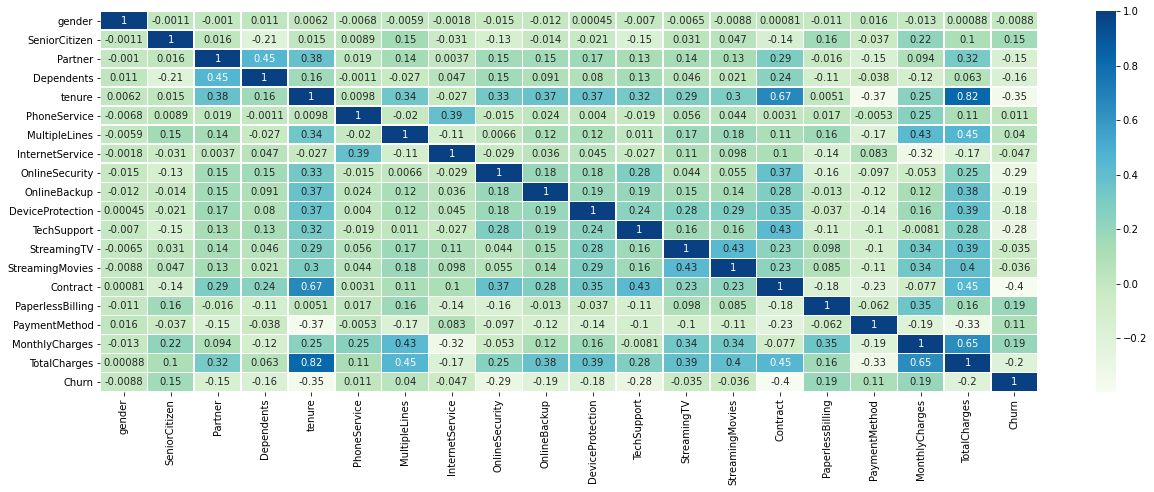

In [85]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(21, 7))
sns.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

- Tenure is strongly correlated with Totalcharges and Contract.
- Tenure column is almost have positive correlation with all the columns.
- Total Charges and Monthly charges are positively correlation value of(0.65).


### Removing the outliers

In [86]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [87]:
df.shape

(7021, 20)

In [88]:
new_df.shape

(6339, 20)

In [89]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

9.713715994872524

After removing the outliers from the data the shape of the data has change from (7021,20) to (6339,20) which shows that with the z score method we are able to remove various rows with lossing about 9.71 percent of data , Hence our new data shape is (6339,20).

### Checking for Skewness

In [90]:
new_df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
PhoneService        0.000000
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895863
Churn               1.058644
dtype: float64

Normal skewness range is -0.5 to 0.5 Total Charges is having value of 0.89

In [91]:
#Applying log transformation technique.
new_df['TotalCharges'] =np.log1p(new_df['TotalCharges'])

In [92]:
new_df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
PhoneService        0.000000
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges       -0.745478
Churn               1.058644
dtype: float64

In [93]:
#Splitting dataset into feature and target variables.
from sklearn.model_selection import train_test_split
x = new_df.drop(['Churn'], axis = 1)
y=new_df["Churn"]

#### Handling Class Imbalanced problem by oversampling the minority class

In [94]:
from imblearn.over_sampling import SMOTE
SM =SMOTE(0.70)
x_over, y_over = SM.fit_resample(x, y)

In [95]:
y_over.value_counts()

0    4652
1    3256
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

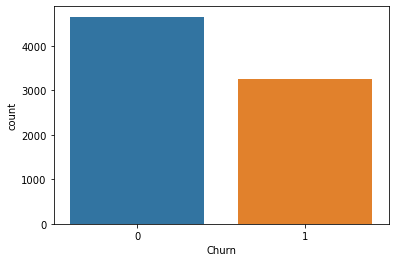

In [96]:
sns.countplot(y_over)

Now the dataset is balanced

#### Applying Standard Scealer

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

#### Finding the best random state

In [98]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.8040455120101138 on random state 112


In [99]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=maxRS)

### Model building

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Logistic Regression

Accuracy score using logistic regression model is 80.44669195111673
Cross validation score 80.61209195322168
-----------------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1396
           1       0.75      0.79      0.77       977

    accuracy                           0.80      2373
   macro avg       0.80      0.80      0.80      2373
weighted avg       0.81      0.80      0.81      2373

-----------------------------

 Confusion Matrix


<AxesSubplot:>

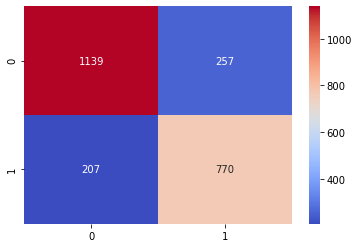

In [101]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


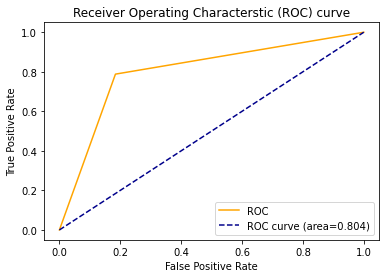

In [102]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% lr_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

Accuracy of Decision Tree classification is  76.61188369152971
F1 Score is  71.4064914992272
Cross validation score 73.33982755658688
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1396
           1       0.72      0.71      0.71       977

    accuracy                           0.77      2373
   macro avg       0.76      0.76      0.76      2373
weighted avg       0.77      0.77      0.77      2373


 Confusion Matrix


<AxesSubplot:>

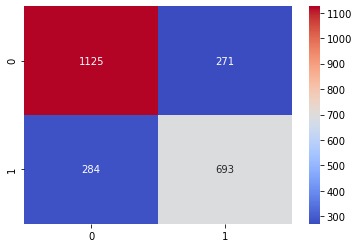

In [103]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred)
print("F1 Score is ",dtc_f1*100)
dtc_cv=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",dtc_cv*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

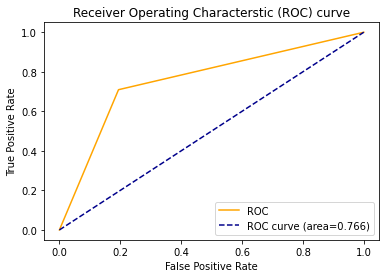

In [104]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% dtc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Gaussian NB classifier

Accuracy score using GuassianNB classifier model is 77.87610619469027
F1 Score is  75.08305647840533
Cross validation score 75.89518199178865
-------------------------------
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1396
           1       0.70      0.81      0.75       977

    accuracy                           0.78      2373
   macro avg       0.78      0.78      0.78      2373
weighted avg       0.79      0.78      0.78      2373

-------------------------------

 Confusion Matrix


<AxesSubplot:>

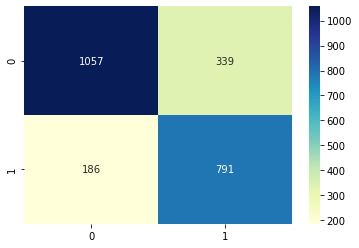

In [105]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
gnb_f1=f1_score(y_test,pred)
print("F1 Score is ",gnb_f1*100)
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

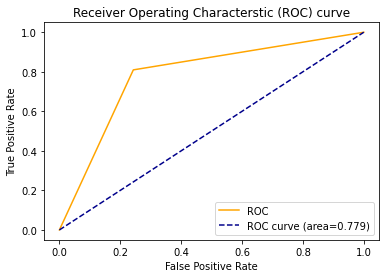

In [106]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gnb_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

Accuracy of Random Forest Classificarion is  83.22798145806996
Cross validation score 77.44140882733002
F1 Score is  78.64806866952789
-------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1396
           1       0.83      0.75      0.79       977

    accuracy                           0.83      2373
   macro avg       0.83      0.82      0.82      2373
weighted avg       0.83      0.83      0.83      2373

-------------------------------

 Confusion Matrix


<AxesSubplot:>

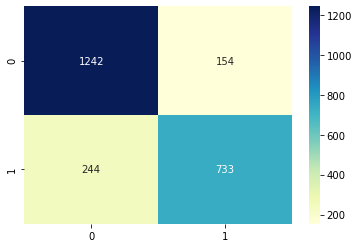

In [107]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=10) # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

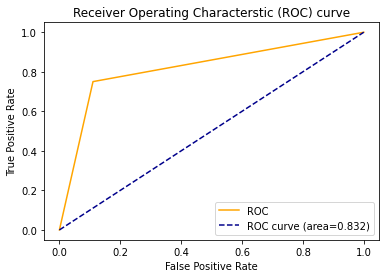

In [108]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% rfc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Classifier

Accuracy of Support Vector Classification is  76.78044669195113
F1 Score is  70.61333333333333
Cross validation score 80.09161211934102
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1396
           1       0.74      0.68      0.71       977

    accuracy                           0.77      2373
   macro avg       0.76      0.75      0.76      2373
weighted avg       0.77      0.77      0.77      2373


 Confusion Matrix


<AxesSubplot:>

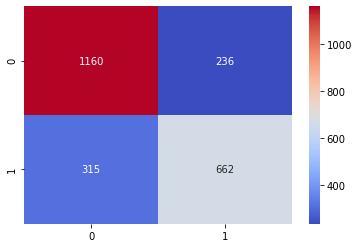

In [109]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
svc_f1=f1_score(y_test,pred)
print("F1 Score is ",svc_f1*100)
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

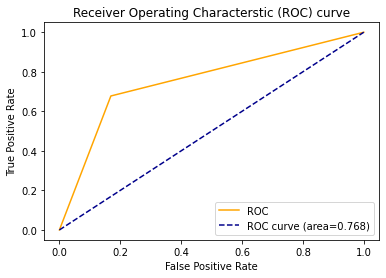

In [110]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% svc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting classifier

Accuracy score using gradient boosting classifier model is 81.58449220396123
Cross validation score 80.42275526032083
-------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1396
           1       0.77      0.79      0.78       977

    accuracy                           0.82      2373
   macro avg       0.81      0.81      0.81      2373
weighted avg       0.82      0.82      0.82      2373

-------------------------------

 Confusion Matrix


<AxesSubplot:>

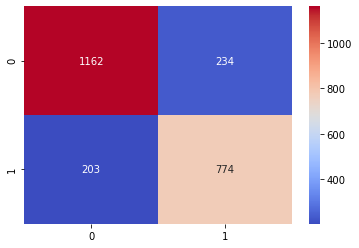

In [111]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_cv=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",gbc_cv*100)
print('-------------------------------')
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

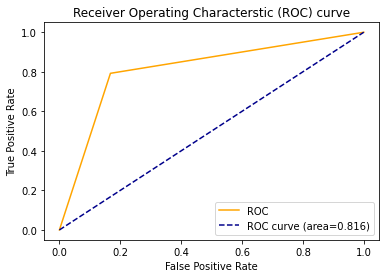

In [112]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gbc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Storing the model scores in dataframe

In [113]:
model=['Logistic Regression','Decision Tree Classifier','GaussianNB Classifier','Random Forest Classifier',
       'Support Vector Classifier','Gradient boosting Classifier']

acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]

cv_score=[lr_cv*100,dtc_cv*100,gnb_cv*100,rfc_cv*100,CV2*100,gbc_cv*100]

result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score})
result

,Model,Accuracy_score,Cross Validation_score
0,Logistic Regression,80.446692,80.612092
1,Decision Tree Classifier,76.611884,73.339828
2,GaussianNB Classifier,77.876106,75.895182
3,Random Forest Classifier,83.227981,77.441409
4,Support Vector Classifier,76.780447,80.091612
5,Gradient boosting Classifier,81.584492,80.422755


#### Choosing the model
Choosing Gradient boosting Classifier as best model because it is giving best accuracy score of 81.58% and Cross validation Score is 80.42%.

#### Applying hyperparameter to the best accuracy model

In [117]:
parameters= {
    'n_estimators':[30,50],
    'max_depth': [8,12],
    'criterion':['friedman_mse', 'mse'],
    'learning_rate':[0.2,0.3]
    }

In [118]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [119]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.2, 0.3], 'max_depth': [8, 12],
                         'n_estimators': [30, 50]})

In [120]:
GCV.best_params_


{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'max_depth': 12,
 'n_estimators': 50}

Accuracy of the model using Gradient boosting classifier is  82.38516645596292
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1396
           1       0.78      0.79      0.79       977

    accuracy                           0.82      2373
   macro avg       0.82      0.82      0.82      2373
weighted avg       0.82      0.82      0.82      2373

-------------------------------

 Confusion Matrix


<AxesSubplot:>

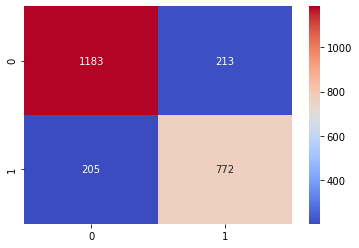

In [121]:
Final_model=GradientBoostingClassifier(n_estimators= 50,criterion='friedman_mse',learning_rate=0.3,max_depth=12)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Gradient boosting classifier is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

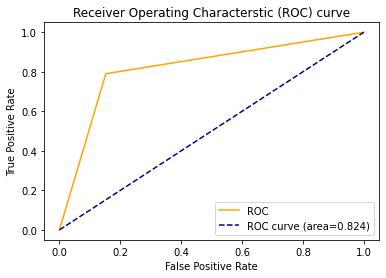

In [122]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### With hyperparameter tuning model accuracy has increased from 84.16 to 85.20 percent.


### Saving the model

In [123]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [124]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']